# **Mall Customers Dataset**
## Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import floor

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data = pd.DataFrame(data)
df = data.copy()
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Remove space and rename columns**

In [4]:
# Remove Spaces
df.columns = df.columns.str.replace(' ', '')

# Rename some column names
df = df.rename(columns={"Genre":"Gender", "AnnualIncome(k$)": "IncomeAnnual", "SpendingScore(1-100)":"SpendingScore"})
df.columns

Index(['CustomerID', 'Gender', 'Age', 'IncomeAnnual', 'SpendingScore'], dtype='object')

In [5]:
# Convert annual income into thousands
df.IncomeAnnual = df.IncomeAnnual * 1000
df.IncomeAnnual

0       15000
1       15000
2       16000
3       16000
4       17000
        ...  
195    120000
196    126000
197    126000
198    137000
199    137000
Name: IncomeAnnual, Length: 200, dtype: int64

**Identify Missing Values if Any**

In [6]:
# Identify Missing Values if Any
df.isnull().sum().sort_values(ascending=False)

CustomerID       0
Gender           0
Age              0
IncomeAnnual     0
SpendingScore    0
dtype: int64

**Summary Statistics**

In [7]:
df.describe()

,CustomerID,Age,IncomeAnnual,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60560.000000,50.200000
std,57.879185,13.969007,26264.721165,25.823522
min,1.000000,18.000000,15000.000000,1.000000
25%,50.750000,28.750000,41500.000000,34.750000
50%,100.500000,36.000000,61500.000000,50.000000
75%,150.250000,49.000000,78000.000000,73.000000
max,200.000000,70.000000,137000.000000,99.000000


**Gender Distribution**

A bar plot and pie chart to show the gender distribution in the dataset

In [9]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

**Customer Gender Visualization**

In [18]:
sns.set_theme(style="ticks", color_codes=True)

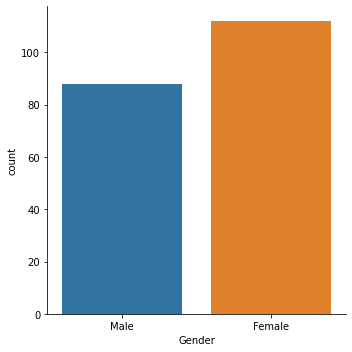

In [11]:
sns.catplot(x="Gender", kind="count", data=df)


Text(0.5, 1.0, 'Ratio of male and female distribution')

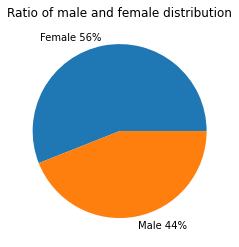

In [10]:
df_to_pie = df.groupby('Gender')['Gender'].count()

fem_ratio = floor((df_to_pie.Female / df_to_pie.sum()) *100)
male_ratio = 100 - fem_ratio
plt.pie(x=df_to_pie, labels=['Female '+str(fem_ratio)+"%", 'Male '+str(male_ratio)+"%"])
plt.title("Ratio of male and female distribution")

**Age Distribution**

<bound method Series.aggregate of 0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64>